In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from collections import Counter

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


In [3]:
# os.chdir('E:/Kaggle_python')

In [4]:
os.getcwd()
#os.chdir('C:/Users/Car/.ipython')

'C:\\Users\\Car'

In [3]:
train=pd.read_csv('E:/Kaggle_python/train.csv')

In [4]:
test=pd.read_csv('E:/Kaggle_python/test.csv')

In [5]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

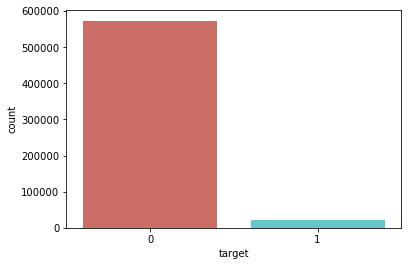

In [6]:
#### EDA
train.dtypes
sns.countplot(x='target',data=train,palette='hls')
plt.show()

In [7]:
### replace -1 with NA
train=train.replace(-1,np.nan)

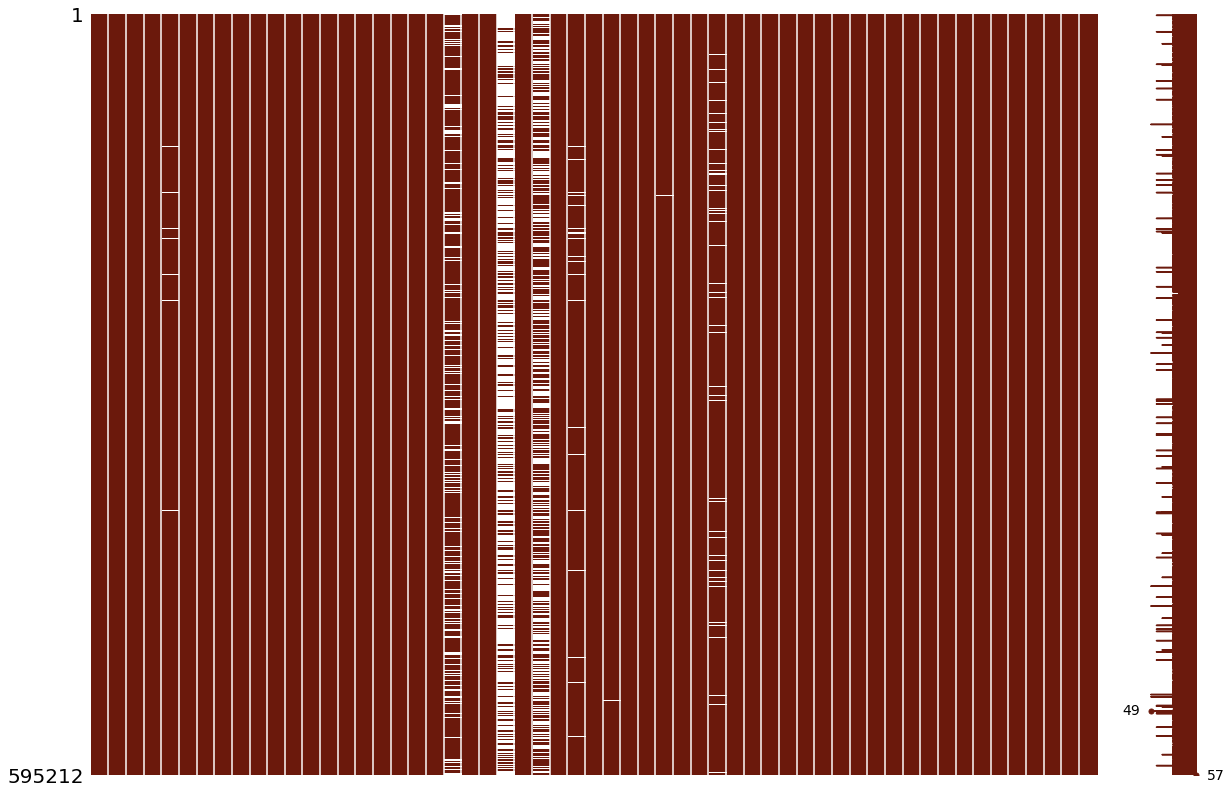

In [10]:
### missing value analysis
import missingno as msno
msno.matrix(df=train.iloc[:,2:59], figsize=(20, 14), color=(0.42, 0.1, 0.05))

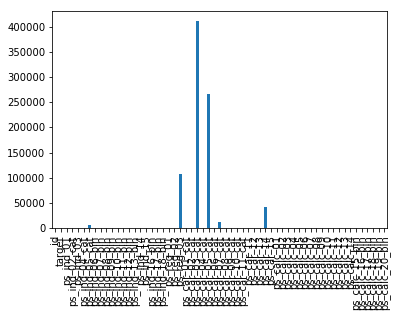

In [11]:
train.isnull().sum().plot(kind='bar')

In [11]:
train.ps_ind_02_cat.value_counts()

1.0    431859
2.0    123573
3.0     28186
4.0     11378
Name: ps_ind_02_cat, dtype: int64

In [8]:
train.target.value_counts()### preform sampling due to imbalanced dataset. Split the dataset and then perform sampling on train alone
train.fillna(0,inplace=True)

0    573518
1     21694
Name: target, dtype: int64

In [9]:
train.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


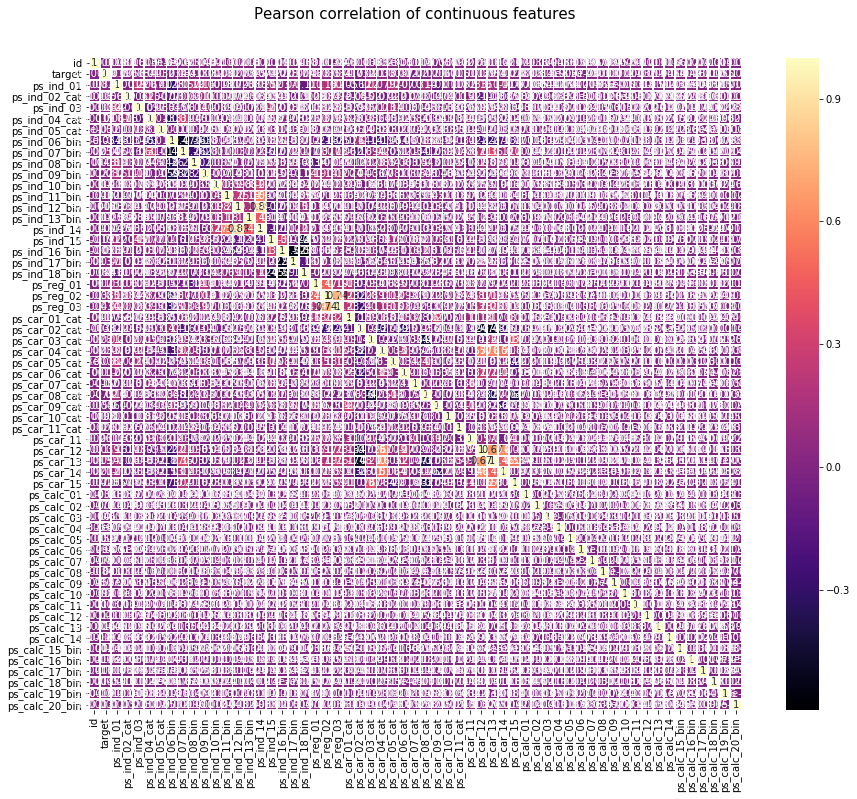

In [12]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.5,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [11]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

VarianceThreshold(threshold=0.01)

6 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12']


In [12]:
bin_col=[col for col in train.columns if '_bin' in col]
zero_list=[]
one_list=[]
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==0).sum())

In [13]:
trace1=go.Bar(x=bin_col,y=zero_list,name='Zero_Count')
trace2=go.Bar(x=bin_col,y=one_list,name='One_Count')
data=[trace1,trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)


In [14]:
py.iplot(fig, filename='stacked-bar')

In [11]:
#### GINI coefficient 
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [12]:
### train and test split
x=train.loc[:,train.columns!='target']
y=train['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

In [13]:
### SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(ratio='auto')
x_sam,y_sam=sm.fit_sample(x_train,y_train)

In [14]:
print('Resampled dataset shape {}'.format(Counter(y_sam)))

Resampled dataset shape Counter({0: 458814, 1: 458814})


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_sam,y_sam)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred=logreg.predict(x_test)

In [17]:
gini(y_test,y_pred)

0.083221407557103222

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[72414, 42290],
       [ 1996,  2343]], dtype=int64)

In [19]:
Counter(y_pred)

Counter({0: 74410, 1: 44633})

In [20]:
y_sub=logreg.predict_proba(test)

In [ ]:
pd.DataFrame(y_sub).to_csv("submission.csv")

In [22]:
### Decision tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
%qtconsole

In [21]:
par_list={'min_samples_split':[60,65],'min_samples_leaf':np.linspace(20,30,5,dtype=int)}
rf_grid=GridSearchCV(DecisionTreeClassifier(random_state=0),par_list,cv=5)

In [22]:
dec_tree= rf_grid.fit(x_sam,y_sam)

In [23]:
dec_tree.cv_results_

C:\Users\Car\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Car\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Car\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\Car\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by defau

{'mean_fit_time': array([ 30.73385692,  29.63427639,  29.4744657 ,  29.94523187,
         36.44992228,  35.63194451,  32.7843473 ,  33.95977688,
         31.35825129,  29.64833508]),
 'mean_score_time': array([ 0.10537477,  0.08966899,  0.08756642,  0.09427896,  0.12249184,
         0.11940198,  0.09006057,  0.12048631,  0.09076777,  0.08848977]),
 'mean_test_score': array([ 0.97544757,  0.97543667,  0.97533096,  0.97531897,  0.97516096,
         0.97516641,  0.97508576,  0.97508903,  0.97491903,  0.97492666]),
 'mean_train_score': array([ 0.97690949,  0.97679833,  0.97677055,  0.97665558,  0.976597  ,
         0.97648121,  0.97647522,  0.97636406,  0.97630876,  0.97621422]),
 'param_min_samples_leaf': masked_array(data = [20 20 22 22 25 25 27 27 30 30],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_min_samples_split': masked_array(data = [60 65 60 65 60 65 60 65 60 65],
              mask = [False False False False

In [24]:
dec_pre=dec_tree.predict(x_test)

In [25]:
gini(y_test,dec_pre)

0.00069117703661348456

In [27]:
# ## random forest
# par_list={'n_estimators':np.linspace(100,110,2,dtype=int),'max_features':[7,8,9]}
# grid_rf=GridSearchCV(RandomForestClassifier(random_state=1,n_jobs=-1),par_list,cv=2)

In [23]:
check=RandomForestClassifier(n_estimators=100,max_features=8,random_state=0,n_jobs=-1)
rf=check.fit(x_train,y_train)

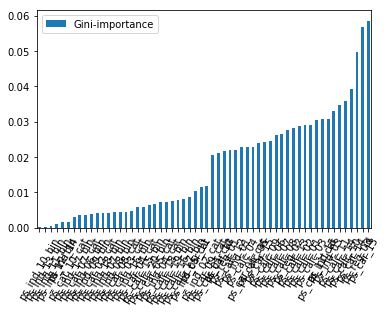

In [27]:
### feature importance plot
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
plt.figure(figsize=(15,12)) # this creates a figure 8 inch wide, 4 inch high
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=60,align='center')

In [28]:
rf_pre=rf.predict(x_test)

In [29]:
gini(y_test,rf_pre)

-0.00019115726709786288

In [31]:
###gbm
gb=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100,max_depth=4,max_features=8,min_samples_leaf=50,random_state=1)
gb1=gb.fit(x_train,y_train)

In [33]:
gb1.feature_importances_

array([ 0.05587172,  0.03713124,  0.02069265,  0.07692295,  0.00936936,
        0.02749023,  0.00381411,  0.01094849,  0.00999896,  0.00433512,
        0.00112637,  0.        ,  0.0040889 ,  0.00130585,  0.00481972,
        0.04022368,  0.00760634,  0.01568544,  0.00180903,  0.03355317,
        0.03302778,  0.07165164,  0.02837389,  0.00475348,  0.00919038,
        0.01667803,  0.00435809,  0.01789622,  0.01363788,  0.00551079,
        0.02089104,  0.00215378,  0.01862417,  0.01036827,  0.03037127,
        0.09369025,  0.04929591,  0.02321049,  0.01640877,  0.00928501,
        0.00521569,  0.00711139,  0.01620703,  0.01488693,  0.01413799,
        0.00946182,  0.0039159 ,  0.01748894,  0.01438232,  0.01536855,
        0.01165781,  0.01091844,  0.00295163,  0.        ,  0.00099985,
        0.00266494,  0.00463447,  0.00182585])

<Container object of 58 artists>

([<matplotlib.axis.YTick at 0x1b9f6f4438>,
 <a list of 58 Text yticklabel objects>)

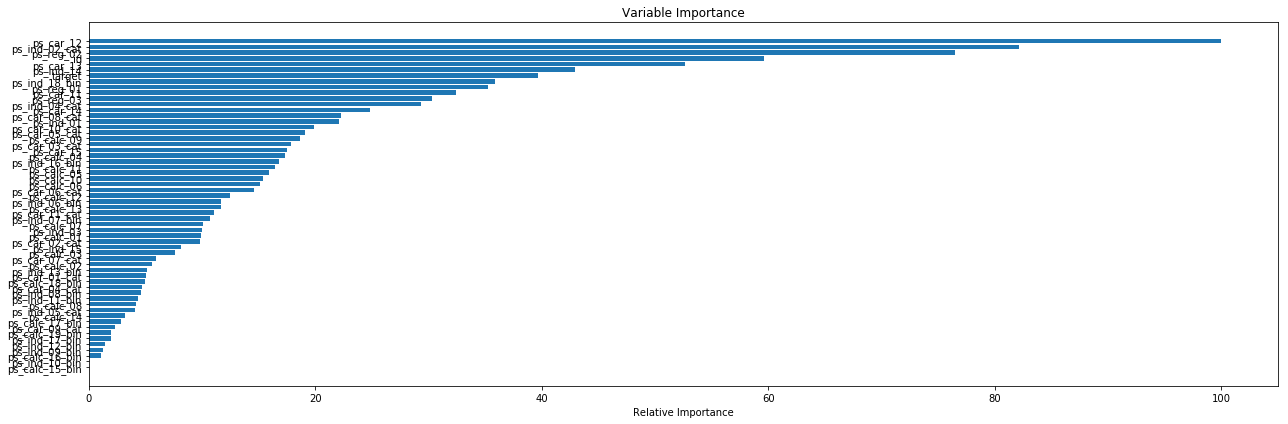

In [48]:
### variable importance of GBM
feature_importance = gb1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(18, 6))
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.tight_layout()
plt.show()

In [ ]:
# import graphviz 
# from sklearn import tree

In [ ]:
# dot_data = tree.export_graphviz(d1, out_file=None)  
# graph = graphviz.Source(dot_data)  
# graph 


In [1]:
# ##PCA
# from sklearn.decomposition import PCA as sklearnPCA
# sklearn_pca=sklearnPCA(n_components=2)
# print (sklearn_pca.explained_variance_ratio_)
# Y_sklearn=sklearn_pca.fit_transform(train)

In [2]:
###### GINI Explanation (one of the popular metrics in kaggle)
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
data=zip(actual,predictions)


In [22]:
sorted_data = sorted(data, key=lambda d: d[1])
list(sorted_data)


[(0, 0.05),
 (0, 0.05),
 (0, 0.1),
 (0, 0.1),
 (1, 0.3),
 (0, 0.4),
 (0, 0.4),
 (0, 0.5),
 (1, 0.6),
 (1, 0.65),
 (0, 0.7),
 (1, 0.75),
 (0, 0.78),
 (1, 0.8),
 (1, 0.9)]

In [24]:
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


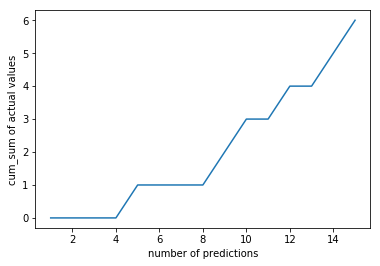

In [27]:
cumulative_actual=np.cumsum(sorted_actual)
cumulative_index=np.arange(1,len(cumulative_actual)+1)
plt.plot(cumulative_index,cumulative_actual)
plt.xlabel('number of predictions')
plt.ylabel('cum_sum of actual values')
plt.show()

In [32]:
cumulative_actual_shares = cumulative_actual / sum(actual)
cumulative_index_shares = cumulative_index / len(predictions)
cumulative_actual_shares

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.16666667,
        0.16666667,  0.16666667,  0.16666667,  0.33333333,  0.5       ,
        0.5       ,  0.66666667,  0.66666667,  0.83333333,  1.        ])

In [33]:
# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)
x_values,y_values

([0,
  0.066666666666666666,
  0.13333333333333333,
  0.20000000000000001,
  0.26666666666666666,
  0.33333333333333331,
  0.40000000000000002,
  0.46666666666666667,
  0.53333333333333333,
  0.59999999999999998,
  0.66666666666666663,
  0.73333333333333328,
  0.80000000000000004,
  0.8666666666666667,
  0.93333333333333335,
  1.0],
 [0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.33333333333333331,
  0.5,
  0.5,
  0.66666666666666663,
  0.66666666666666663,
  0.83333333333333337,
  1.0])

In [31]:
# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]
diagonal

[0,
 0.066666666666666666,
 0.13333333333333333,
 0.20000000000000001,
 0.26666666666666666,
 0.16666666666666666,
 0.23333333333333336,
 0.30000000000000004,
 0.3666666666666667,
 0.26666666666666666,
 0.16666666666666663,
 0.23333333333333328,
 0.13333333333333341,
 0.20000000000000007,
 0.099999999999999978,
 0.0]

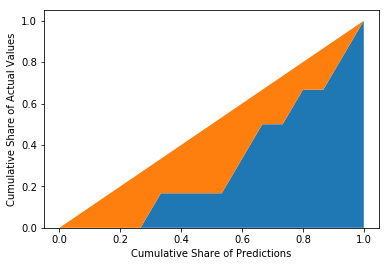

In [34]:
plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

In [38]:
fy = scipy.interpolate.interp1d(x_values, y_values)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

Orange Area: 0.189
